In [1]:
import os, shutil

In [3]:
### 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 구글 드라이브에서 데이터 복사
!cp -r '/content/drive/MyDrive/goorm_project_class/data/cats_dogs' '/content/'
!ls -ls '/content/cats_dogs'

total 833956
    88 -rw------- 1 root root     88903 Jul 19 00:24 sampleSubmission.csv
277664 -rw------- 1 root root 284321224 Jul 19 00:24 test1.zip
556204 -rw------- 1 root root 569546721 Jul 19 00:24 train.zip


In [5]:
# 압축을 풀고, 파일 개수 확인
!rm -rf '/content/datasets/'
!unzip '/content/cats_dogs/test1.zip' -d '/content/datasets/' 
!unzip '/content/cats_dogs/train.zip' -d '/content/datasets/'
!ls '/content/datasets/'
!ls -l '/content/datasets/train/' | grep ^- | wc -l
!ls -l '/content/datasets/test1/' | grep ^- | wc -l

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/datasets/train/dog.5500.jpg  
  inflating: /content/datasets/train/dog.5501.jpg  
  inflating: /content/datasets/train/dog.5502.jpg  
  inflating: /content/datasets/train/dog.5503.jpg  
  inflating: /content/datasets/train/dog.5504.jpg  
  inflating: /content/datasets/train/dog.5505.jpg  
  inflating: /content/datasets/train/dog.5506.jpg  
  inflating: /content/datasets/train/dog.5507.jpg  
  inflating: /content/datasets/train/dog.5508.jpg  
  inflating: /content/datasets/train/dog.5509.jpg  
  inflating: /content/datasets/train/dog.551.jpg  
  inflating: /content/datasets/train/dog.5510.jpg  
  inflating: /content/datasets/train/dog.5511.jpg  
  inflating: /content/datasets/train/dog.5512.jpg  
  inflating: /content/datasets/train/dog.5513.jpg  
  inflating: /content/datasets/train/dog.5514.jpg  
  inflating: /content/datasets/train/dog.5515.jpg  
  inflating: /content/datasets/train/dog.5516.jpg  
  inflating: /content/dataset

In [6]:
!ls -al '/content/datasets/train' | head -5
!ls -l '/content/datasets/train' | grep cat | wc -l
!ls -l '/content/datasets/train' | grep dog | wc -l

!ls -al '/content/datasets/test1' | head -5
!ls -l '/content/datasets/test1' | grep ^- | wc -l
!ls -l '/content/datasets/test1' | grep jpg | wc -l

total 609268
drwxr-xr-x 2 root root 778240 Sep 20  2013 .
drwxr-xr-x 4 root root   4096 Jul 19 00:24 ..
-rw-r--r-- 1 root root  12414 Sep 20  2013 cat.0.jpg
-rw-r--r-- 1 root root  21944 Sep 20  2013 cat.10000.jpg
12500
12500
total 304264
drwxr-xr-x 2 root root 274432 Sep 20  2013 .
drwxr-xr-x 4 root root   4096 Jul 19 00:24 ..
-rw-r--r-- 1 root root  54902 Sep 20  2013 10000.jpg
-rw-r--r-- 1 root root  21671 Sep 20  2013 10001.jpg
12500
12500


# 데이터 준비

In [7]:
# 원본 데이터셋을 압축 해제한 학습용 데이터 디렉터리 경로 
ori_dataset_dir = './datasets/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './datasets/cats_and_dogs_small'

In [8]:
# 반복실행을 위해 디렉터리 삭제 ( cats_and_dogs_small )
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
os.mkdir(base_dir)

In [9]:
# 학습, 검증, 테스트 분할을 위한 디렉터리 생성
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

val_dir = os.path.join(base_dir, 'validation')
os.mkdir(val_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

print(train_dir, val_dir, test_dir, sep="\n")

./datasets/cats_and_dogs_small/train
./datasets/cats_and_dogs_small/validation
./datasets/cats_and_dogs_small/test


In [10]:
# 학습용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 학습용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
val_cats_dir = os.path.join(val_dir, 'cats')
os.mkdir(val_cats_dir)

# 검증용 강아지 사진 디렉터리
val_dogs_dir = os.path.join(val_dir, 'dogs')
os.mkdir(val_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)


# 데이터 복사



In [11]:
# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개의 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(val_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개의 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(val_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
print('학습용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('학습용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))

print('검증용 고양이 이미지 전체 개수:', len(os.listdir(val_cats_dir)))
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(val_dogs_dir)))

print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

학습용 고양이 이미지 전체 개수: 1000
학습용 강아지 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500
검증용 강아지 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500
테스트용 강아지 이미지 전체 개수: 500


# 사전훈련 네트워크

In [13]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,  # 완전 분류 연결기 포함/미포함
                  input_shape=(150, 150, 3))

58900480/58889256 [==============================] - 0s 0us/step


In [14]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [15]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './datasets/cats_and_dogs_small'

# 데이터 디렉터리
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

print("데이터 디렉터리 : ", train_dir, validation_dir, test_dir, sep="\n")

데이터 디렉터리 : 
./datasets/cats_and_dogs_small/train
./datasets/cats_and_dogs_small/validation
./datasets/cats_and_dogs_small/test


# 이미지 제너레이터 활용 데이터 가져오기

In [16]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))

    print("피처, 레이블 : ", features.shape, labels.shape  )
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

    # 이미지를 20개씩 가져오기(이미지 사이즈 :150, 150)
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        print( "추출된 피처 :", type(features_batch), features_batch.shape  )

        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch

        i += 1
        if i * batch_size >= sample_count:
            # 제너레이터는 루프 안에서 무한하게 데이터를 만들어내므로 
            # 모든 이미지를 한 번씩 처리하고 나면 중지합니다
            break

    return features, labels

In [17]:
# extract_features(데이터가 있는 디렉터리, 샘플 데이터 개수)
t_features, t_labels = extract_features(train_dir, 100)
print( t_features.shape, t_labels.shape )

피처, 레이블 :  (100, 4, 4, 512) (100,)
Found 2000 images belonging to 2 classes.
추출된 피처 : <class 'numpy.ndarray'> (20, 4, 4, 512)
추출된 피처 : <class 'numpy.ndarray'> (20, 4, 4, 512)
추출된 피처 : <class 'numpy.ndarray'> (20, 4, 4, 512)
추출된 피처 : <class 'numpy.ndarray'> (20, 4, 4, 512)
추출된 피처 : <class 'numpy.ndarray'> (20, 4, 4, 512)
(100, 4, 4, 512) (100,)


In [18]:
%%time

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

피처, 레이블 :  (2000, 4, 4, 512) (2000,)
Found 2000 images belonging to 2 classes.
추출된 피처 : <class 'numpy.ndarray'> (20, 4, 4, 512)
추출된 피처 : <class 'numpy.ndarray'> (20, 4, 4, 512)
추출된 피처 : <class 'numpy.ndarray'> (20, 4, 4, 512)
추출된 피처 : <class 'numpy.ndarray'> (20, 4, 4, 512)
추출된 피처 : <class 'numpy.ndarray'> (20, 4, 4, 512)
추출된 피처 : <class 'numpy.ndarray'> (20, 4, 4, 512)
추출된 피처 : <class 'numpy.ndarray'> (20, 4, 4, 512)
추출된 피처 : <class 'numpy.ndarray'> (20, 4, 4, 512)
추출된 피처 : <class 'numpy.ndarray'> (20, 4, 4, 512)
추출된 피처 : <class 'numpy.ndarray'> (20, 4, 4, 512)
추출된 피처 : <class 'numpy.ndarray'> (20, 4, 4, 512)
추출된 피처 : <class 'numpy.ndarray'> (20, 4, 4, 512)
추출된 피처 : <class 'numpy.ndarray'> (20, 4, 4, 512)
추출된 피처 : <class 'numpy.ndarray'> (20, 4, 4, 512)
추출된 피처 : <class 'numpy.ndarray'> (20, 4, 4, 512)
추출된 피처 : <class 'numpy.ndarray'> (20, 4, 4, 512)
추출된 피처 : <class 'numpy.ndarray'> (20, 4, 4, 512)
추출된 피처 : <class 'numpy.ndarray'> (20, 4, 4, 512)
추출된 피처 : <class 'numpy.ndarray'> (20, 4

In [19]:
print( train_features.shape, train_labels.shape )
print( validation_features.shape, validation_labels.shape )
print( test_features.shape, test_labels.shape )

(2000, 4, 4, 512) (2000,)
(1000, 4, 4, 512) (1000,)
(1000, 4, 4, 512) (1000,)


In [20]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [21]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [22]:
%%time

# 완전 연결층
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


100/100 [==============================] - 4s 30ms/step - loss: 0.5831 - acc: 0.6815 - val_loss: 0.4482 - val_acc: 0.8370
Epoch 2/30
100/100 [==============================] - 3s 34ms/step - loss: 0.4245 - acc: 0.8180 - val_loss: 0.3679 - val_acc: 0.8690
Epoch 3/30
100/100 [==============================] - 2s 23ms/step - loss: 0.3579 - acc: 0.8570 - val_loss: 0.3276 - val_acc: 0.8810
Epoch 4/30
100/100 [==============================] - 2s 23ms/step - loss: 0.3218 - acc: 0.8705 - val_loss: 0.3023 - val_acc: 0.8810
Epoch 5/30
100/100 [==============================] - 2s 23ms/step - loss: 0.2959 - acc: 0.8785 - val_loss: 0.2870 - val_acc: 0.8830
Epoch 6/30
100/100 [==============================] - 2s 23ms/step - loss: 0.2708 - acc: 0.8910 - val_loss: 0.2761 - val_acc: 0.8920
Epoch 7/30
100/100 [==============================] - 2s 23ms/step - loss: 0.2568 - acc: 0.8970 - val_loss: 0.2701 - val_acc: 0.8960
Epoch 8/30
100/100 [==============================] - 2s 23ms/step - loss: 0.238

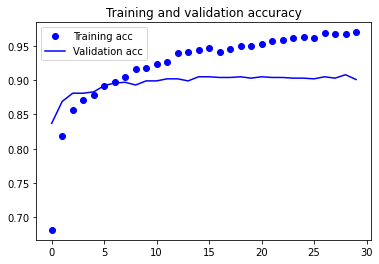

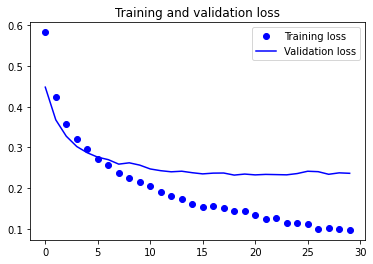

In [23]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()